TOXIC WASTE MANAGEMENT


In [ ]:
# Import all the necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Correcting the file path (ensure the file exists in the given location)
waste = pd.read_csv("/content/five_us.csv")

waste



,Source.Name,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,...,113. 8.2 - ENERGY RECOVER ON,114. 8.3 - ENERGY RECOVER OF,115. 8.4 - RECYCLING ON SITE,116. 8.5 - RECYCLING OFF SIT,117. 8.6 - TREATMENT ON SITE,118. 8.7 - TREATMENT OFF SITE,119. PRODUCTION WSTE (8.1-8.7),120. 8.8 - ONE-TIME RELEASE,121. PROD_RATIO_OR_ ACTIVITY,122. 8.9 - PRODUCTION RATIO
0,2018_us.csv,2018,56347LNGPR10RIV,1.100000e+11,LONG PRAIRIE PACKING CO,10 RIVERSIDE DR,LONG PRAIRIE,TODD,MN,56347,...,0,0.0,0.000000e+00,0.00,0.0,2402.4,1.518680e+05,0.0,PRODUCTION,1.04
1,2018_us.csv,2018,36752GPLSTONEPL,1.100170e+11,SABIC INNOVATIVE PLASTICS US LLC,ONE PLASTICS DR,BURKVILLE,LOWNDES,AL,36752,...,0,7572.0,1.960152e+09,0.00,1080719.0,0.0,1.961331e+09,NaN,ACTIVITY,1.06
2,2018_us.csv,2018,5143WPLTNM2585Q,1.100710e+11,POET BIOREFINING - ARTHUR LLC,2585 QUAIL AVENUE,ARTHUR,IDA,IA,51431,...,0,0.0,0.000000e+00,0.00,250.0,0.0,5.800000e+02,NaN,PRODUCTION,1.00
3,2018_us.csv,2018,49720MDSCMBELLS,1.100420e+11,ST MARYS CEMENT U.S. LLC,16000 BELLS BAY RD,CHARLEVOIX,CHARLEVOIX,MI,49720,...,0,0.0,0.000000e+00,0.00,0.0,0.0,0.000000e+00,NaN,PRODUCTION,1.00
4,2018_us.csv,2018,42029WSTLK2468I,1.100270e+11,WESTLAKE VINYLS INC,2468 IND US TRIAL PKWY,CALVERT CITY,MARSHALL,KY,42029,...,0,0.0,0.000000e+00,0.00,2475455.0,0.0,2.480389e+06,8780.0,PRODUCTION,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398681,2022_us (1).csv,2022,90501NTDST401VA,1.100000e+11,US GYPSUM CO,401 VAN NESS AVE,TORRANCE,LOS ANGELES,CA,90501,...,0,0.0,0.000000e+00,0.00,0.0,0.0,3.340000e+00,NaN,PRODUCTION,1.00
398682,2022_us (1).csv,2022,80125LDCST8392R,1.100410e+11,OLDCASTLE PRECAST INC,8392 RIVERVIEW PKWY,LITTLETON,DOUGLAS,CO,80125,...,0,0.0,0.000000e+00,1385.00,0.0,0.0,1.390000e+03,NaN,PRODUCTION,0.87
398683,2022_us (1).csv,2022,4790WNNSHN36US5,1.100670e+11,NANSHAN AMERICA ADVANCED ALUMINUM TECHNOLOGIES,3600 US 52,LAFAYETTE,TIPPECANOE,IN,47905,...,0,0.0,0.000000e+00,8168.65,0.0,0.0,9.127940e+03,NaN,PRODUCTION,0.95
398684,2022_us (1).csv,2022,29073SFTYK130AF,1.100000e+11,SAFETY-KLEEN SYSTEMS INC.,130 A FRONTAGE RD,LEXINGTON,LEXINGTON,SC,29073,...,0,16157.0,5.000000e+00,210555.00,30.0,29.0,2.269700e+05,NaN,PRODUCTION,1.07


In [ ]:
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398686 entries, 0 to 398685
Columns: 123 entries, Source.Name to 122. 8.9 - PRODUCTION RATIO
dtypes: float64(61), int64(31), object(31)
memory usage: 374.1+ MB


In [ ]:
# Assuming 'waste' is your DataFrame
null_values = waste.isnull().sum().reset_index()
null_values.columns = ['Column', 'Null Values Count']

# Display the DataFrame with all rows
print(null_values)

                             Column  Null Values Count
0                       Source.Name                  0
1                           1. YEAR                  0
2                          2. TRIFD                  0
3                         3. FRS ID                 47
4                  4. FACILITY NAME                  0
..                              ...                ...
118   118. 8.7 - TREATMENT OFF SITE                  0
119  119. PRODUCTION WSTE (8.1-8.7)                  0
120     120. 8.8 - ONE-TIME RELEASE             360932
121    121. PROD_RATIO_OR_ ACTIVITY              54628
122     122. 8.9 - PRODUCTION RATIO              27742

[123 rows x 2 columns]


In [ ]:
# Define the columns that need to be filled
columns_to_fill = [
    '51. 5.1 - FUGITIVE AIR', '52. 5.2 - STACK AIR', '53. 5.3 - WATER', '54. 5.4 - UNDERGROUND',
    '57. 5.5.1 - LANDFILLS', '60. 5.5.2 - LAND TREATMENT', '61. 5.5.3 - SURFACE IMPNDMNT', '64. 5.5.4 - OTHER DISPOSAL'
]

# Convert columns to numeric with errors='coerce' to turn non-numeric values into NaN
for col in columns_to_fill:
    waste[col] = pd.to_numeric(waste[col], errors='coerce')

# Fill missing values in the columns with the mean of each column
waste[columns_to_fill] = waste[columns_to_fill].fillna(waste[columns_to_fill].mean())

# Define additional columns to fill
additional_columns = [
    '3. FRS ID', '120. 8.8 - ONE-TIME RELEASE', '121. PROD_RATIO_OR_ ACTIVITY', '122. 8.9 - PRODUCTION RATIO'
]

# Convert additional columns to numeric, then fill NaN values with the column mean
for col in additional_columns:
    waste[col] = pd.to_numeric(waste[col], errors='coerce')
waste[additional_columns] = waste[additional_columns].fillna(waste[additional_columns].mean())

In [ ]:
# Verifying the column datatypes
print(waste[columns_to_fill].head())
print(waste[additional_columns].head())

   51. 5.1 - FUGITIVE AIR  52. 5.2 - STACK AIR  53. 5.3 - WATER  \
0                 43435.0                  0.0              0.0   
1                 89700.0                968.0             32.5   
2                   130.0                200.0              0.0   
3                     0.0                  0.0              0.0   
4                  9221.0               4407.0             86.0   

   54. 5.4 - UNDERGROUND  57. 5.5.1 - LANDFILLS  60. 5.5.2 - LAND TREATMENT  \
0                      0                      0                       81216   
1                      0                      0                           0   
2                      0                      0                           0   
3                      0                      0                           0   
4                      0                      0                           0   

   61. 5.5.3 - SURFACE IMPNDMNT  64. 5.5.4 - OTHER DISPOSAL  
0                             0                         0.0 

In [ ]:
print(waste[columns_to_fill].dtypes)
print(waste[additional_columns].dtypes)

51. 5.1 - FUGITIVE AIR          float64
52. 5.2 - STACK AIR             float64
53. 5.3 - WATER                 float64
54. 5.4 - UNDERGROUND             int64
57. 5.5.1 - LANDFILLS             int64
60. 5.5.2 - LAND TREATMENT        int64
61. 5.5.3 - SURFACE IMPNDMNT      int64
64. 5.5.4 - OTHER DISPOSAL      float64
dtype: object
3. FRS ID                       float64
120. 8.8 - ONE-TIME RELEASE     float64
121. PROD_RATIO_OR_ ACTIVITY    float64
122. 8.9 - PRODUCTION RATIO     float64
dtype: object


In [ ]:
# Check for remaining NaN values in the specific columns
print(waste[columns_to_fill].isnull().sum())
print(waste[additional_columns].isnull().sum())

51. 5.1 - FUGITIVE AIR          0
52. 5.2 - STACK AIR             0
53. 5.3 - WATER                 0
54. 5.4 - UNDERGROUND           0
57. 5.5.1 - LANDFILLS           0
60. 5.5.2 - LAND TREATMENT      0
61. 5.5.3 - SURFACE IMPNDMNT    0
64. 5.5.4 - OTHER DISPOSAL      0
dtype: int64
3. FRS ID                            0
120. 8.8 - ONE-TIME RELEASE          0
121. PROD_RATIO_OR_ ACTIVITY    398686
122. 8.9 - PRODUCTION RATIO          0
dtype: int64


In [ ]:
# Dropping the specified column '121. PROD_RATIO_OR_ ACTIVITY' from the dataset
waste.drop(columns=['121. PROD_RATIO_OR_ ACTIVITY'], inplace=True)

# Verifying the column is removed
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398686 entries, 0 to 398685
Columns: 122 entries, Source.Name to 122. 8.9 - PRODUCTION RATIO
dtypes: float64(61), int64(31), object(30)
memory usage: 371.1+ MB


### Identifying the top 10 Facilities that excrete the most chemicals

In [ ]:
# Top 10 facility names
top_facilities = waste['4. FACILITY NAME'].value_counts().head(10)
top_facilities

,count
4. FACILITY NAME,
SHERWIN-WILLIAMS CO,1967
BASF CORP,1004
HERITAGE THERMAL SERVICES,945
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS,935
VEOLIA ES TECHNICAL SOLUTIONS LLC PORT ARTHUR FACILITY,920
CLEAN HARBORS EL DORADO LLC,909
ADM DECATUR COMPLEX,787
CLEAN HARBORS DEER PARK LLC,774
CLEAN HARBORS ARAGONITE LLC,602


### Identifying the top 10 Cities that excrete the most chemicals

In [ ]:
# Top 10 cities
top_cities = waste['6. CITY'].value_counts().head(10)
top_cities

,count
6. CITY,
HOUSTON,3739
PASADENA,2408
COLUMBUS,2067
BEAUMONT,2054
LOUISVILLE,1878
LA PORTE,1795
DECATUR,1791
FREEPORT,1712
CLEVELAND,1626


### Identifying the top 10 states that excrete the most chemicals

In [ ]:
# Top 10 states
top_states = waste['8. ST'].value_counts().head(10)
top_states

,count
8. ST,
TX,44188
OH,25143
IL,18959
CA,18467
PA,18111
IN,16972
MI,15255
LA,14644
WI,13889


In [ ]:
## Checking for the Chemical List in the Column
chemical_list = waste["37. CHEMICAL"].unique()

# Convert to a list for better readability and display
unique_chemicals_list = chemical_list.tolist()
print("Unique Chemicals in '37. CHEMICAL' Column:")
for chemical in unique_chemicals_list:
    print(chemical)

Unique Chemicals in '37. CHEMICAL' Column:
Ammonia
Dichloromethane
n-Hexane
Ethylene glycol
Chlorine
Bifenthrin
Methyl isobutyl ketone
Acetonitrile
N-Methyl-2-pyrrolidone
Nitrate compounds (water dissociable; reportable only when in aqueous solution)
Zinc compounds
Hydrochloric acid (acid aerosols including mists, vapors, gas, fog, and other airborne forms of any particle size)
n-Butyl alcohol
Simazine
Nitric acid
Nickel
Benzo[g,h,i]perylene
Mercury
Manganese compounds
Formaldehyde
Chlorine dioxide
Polycyclic aromatic compounds
Certain glycol ethers
Lead
Vinyl chloride
Diisocyanates
Copper  And Copper Compounds
Barium compounds (except for barium sulfate (CAS No. 7727-43-7))
Toluene
Antimony  And Antimony Compounds
Methanol
Copper compounds
Dioxin and dioxin-like compounds
Lead compounds
Lead  And Lead Compounds
Pentachlorophenol
Manganese
Manganese  And Manganese Compounds
o-Cresol
Naphthalene
Chloroacetic acid
Sulfuric acid (acid aerosols including mists, vapors, gas, fog, and other 

In [ ]:
## Taking the count to calculate No of times the Chemical Released
chemical_counts = waste["37. CHEMICAL"].value_counts()
chemical_counts

,count
37. CHEMICAL,
Lead,21077
Zinc compounds,15082
Nickel,12918
Chromium,12697
Copper,12250
...,...
"Poly(difluoromethylene), α-[2-[(2-carboxyethyl)thio]ethyl]-ω-fluoro-, lithium salt",1
"1,1,2,2-Tetrahydroperfluorododecyl acrylate",1
"1-Octanesulfonamide, N-butyl-1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluoro-N-(2-hydroxyethyl)-",1


In [ ]:
# List of toxic chemicals to filter
toxic_chemicals_list = [
    "Manganese",
    "Nickel",
    "Vinyl acetate",
    "1,2,4-Trimethylbenzene",
    "Lead compounds",
    "Zinc compounds",
    "n-Hexane",
    "Formaldehyde",
    "Styrene"
]

# Filter the DataFrame to display only the specified chemicals
filtered_data = waste[waste['37. CHEMICAL'].isin(toxic_chemicals_list)]

# Display the filtered DataFrame
print(filtered_data)

            Source.Name  1. YEAR         2. TRIFD     3. FRS ID  \
2           2018_us.csv     2018  5143WPLTNM2585Q  1.100710e+11   
10          2018_us.csv     2018  44622MTRSL4STUS  1.100210e+11   
11          2018_us.csv     2018  02865CHMRT11NEW  1.100000e+11   
14          2018_us.csv     2018  67801FRMLNEASTH  1.100010e+11   
17          2018_us.csv     2018  47905LLLLYLILLY  1.100000e+11   
...                 ...      ...              ...           ...   
398652  2022_us (1).csv     2022  24210STRNG26770  1.100000e+11   
398653  2022_us (1).csv     2022  70807XXNCH11675  1.100130e+11   
398663  2022_us (1).csv     2022  72032VRCMFROBIN  1.100010e+11   
398666  2022_us (1).csv     2022  3626WLBMSP152ME  1.100080e+11   
398677  2022_us (1).csv     2022  17981DYTNS55NPI  1.100210e+11   

                                     4. FACILITY NAME       5. STREET ADDRESS  \
2                       POET BIOREFINING - ARTHUR LLC       2585 QUAIL AVENUE   
10                         METEOR

### Data Analysis

In [ ]:
# Listing the Column Names to Identify Patterns
print(waste.columns.tolist())

['Source.Name', '1. YEAR', '2. TRIFD', '3. FRS ID', '4. FACILITY NAME', '5. STREET ADDRESS', '6. CITY', '7. COUNTY', '8. ST', '9. ZIP', '10. BIA', '11. TRIBE', '12. LATITUDE', '13. LONGITUDE', '14. HORIZONTAL DATUM', '15. PARENT CO NAME', '16. PARENT CO DB NUM', '17. STANDARD PARENT CO NAME', '18. FOREIGN PARENT CO NAME', '19. FOREIGN PARENT CO DB NUM', '20. STANDARD FOREIGN PARENT CO NAME', '21. FEDERAL FACILITY', '22. INDUSTRY SECTOR CODE', '23. INDUSTRY SECTOR', '24. PRIMARY SIC', '25. SIC 2', '26. SIC 3', '27. SIC 4', '28. SIC 5', '29. SIC 6', '30. PRIMARY NAICS', '31. NAICS 2', '32. NAICS 3', '33. NAICS 4', '34. NAICS 5', '35. NAICS 6', '36. DOC_CTRL_NUM', '37. CHEMICAL', '38. ELEMENTAL METAL INCLUDED', '39. TRI CHEMICAL/COMPOUND ID', '40. CAS#', '41. SRS ID', '42. CLEAN AIR ACT CHEMICAL', '43. CLASSIFICATION', '44. METAL', '45. METAL CATEGORY', '46. CARCINOGEN', '47. PBT', '48. PFAS', '49. FORM TYPE', '50. UNIT OF MEASURE', '51. 5.1 - FUGITIVE AIR', '52. 5.2 - STACK AIR', '53. 5.

1. Univariate Visualizations (One Variable)

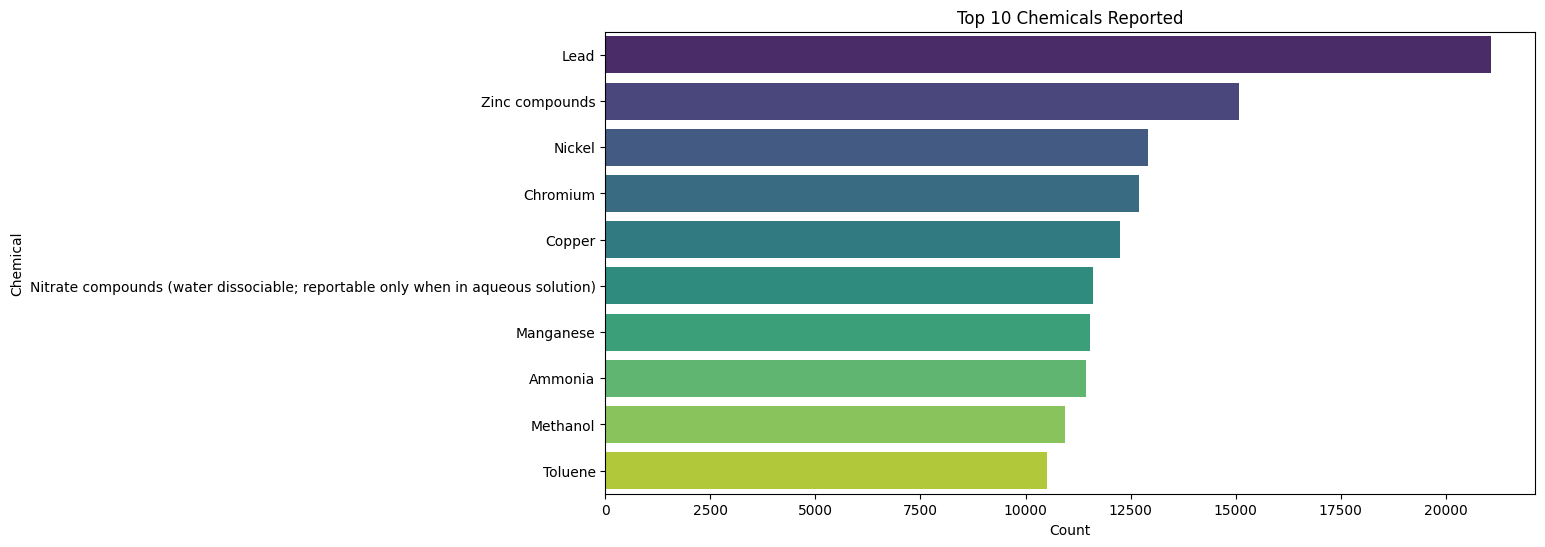

In [ ]:
# 2. Distribution of Chemicals Reported
plt.figure(figsize=(12, 6))
top_chemicals = waste['37. CHEMICAL'].value_counts().head(10)
sns.barplot(y=top_chemicals.index, x=top_chemicals.values, palette="viridis")
plt.title("Top 10 Chemicals Reported")
plt.xlabel("Count")
plt.ylabel("Chemical")
plt.show()

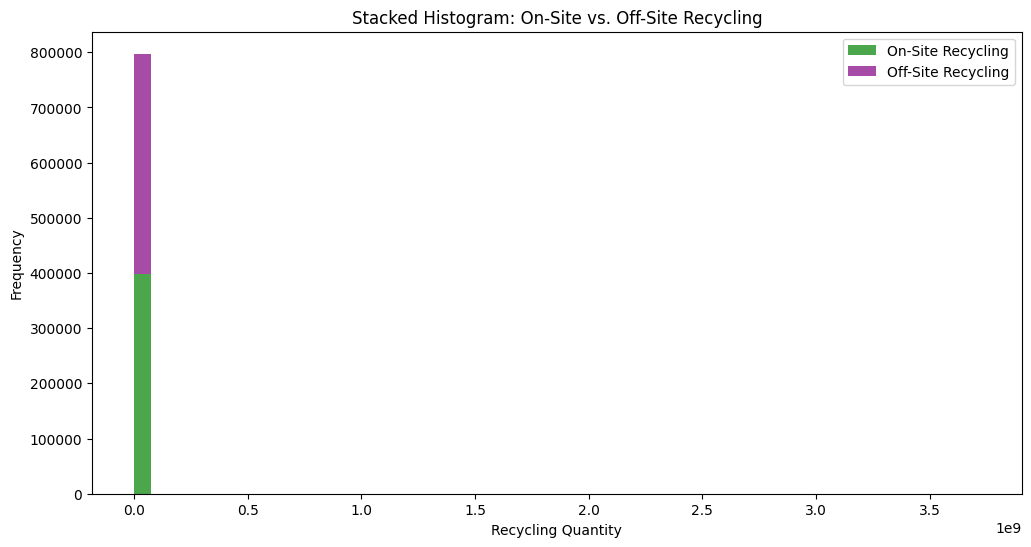

In [ ]:
#histogram representations for enhanced insights
# 2. Stacked Histogram for Recycling Metrics
plt.figure(figsize=(12, 6))
plt.hist(
    [waste['115. 8.4 - RECYCLING ON SITE'], waste['116. 8.5 - RECYCLING OFF SIT']],
    bins=50,
    stacked=True,
    label=['On-Site Recycling', 'Off-Site Recycling'],
    color=['green', 'purple'],
    alpha=0.7
)
plt.title("Stacked Histogram: On-Site vs. Off-Site Recycling")
plt.xlabel("Recycling Quantity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

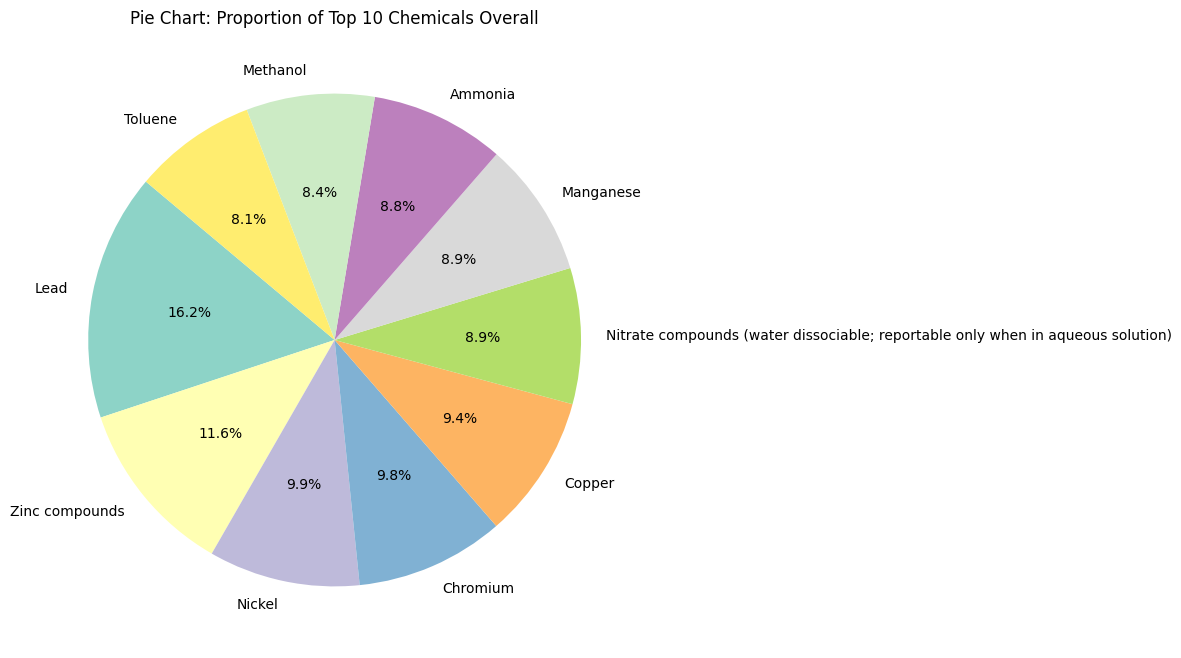

In [ ]:
# 11.Pie Chart
top_chemicals_overall = waste['37. CHEMICAL'].value_counts().head(10)

plt.figure(figsize=(8, 8))
top_chemicals_overall.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="Set3")
plt.title("Pie Chart: Proportion of Top 10 Chemicals Overall")
plt.ylabel("")
plt.show()

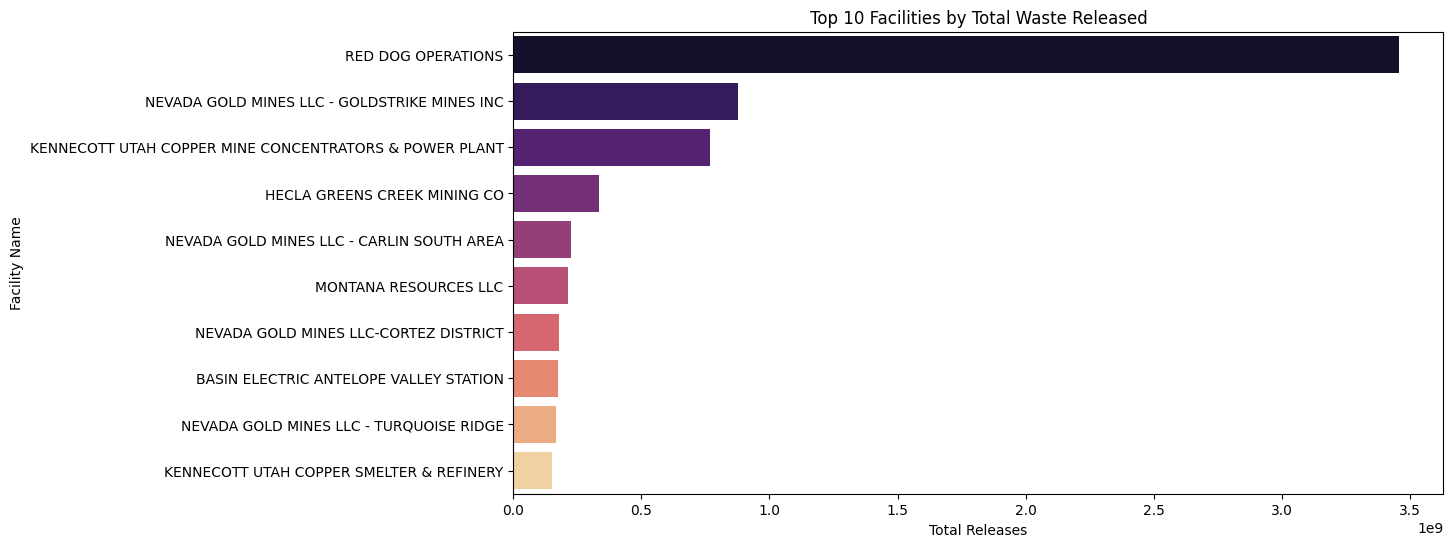

In [ ]:
# Define the columns to sum up
columns_to_convert = ['65. ON-SITE RELEASE TOTAL', '88. OFF-SITE RELEASE TOTAL']
waste['Total Releases'] = waste[columns_to_convert].sum(axis=1)

# Group by facility name and find the top 10 facilities
top_facilities = waste.groupby('4. FACILITY NAME')['Total Releases'].sum().nlargest(10)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(y=top_facilities.index, x=top_facilities.values, palette="magma")
plt.title("Top 10 Facilities by Total Waste Released")
plt.xlabel("Total Releases")
plt.ylabel("Facility Name")
plt.show()

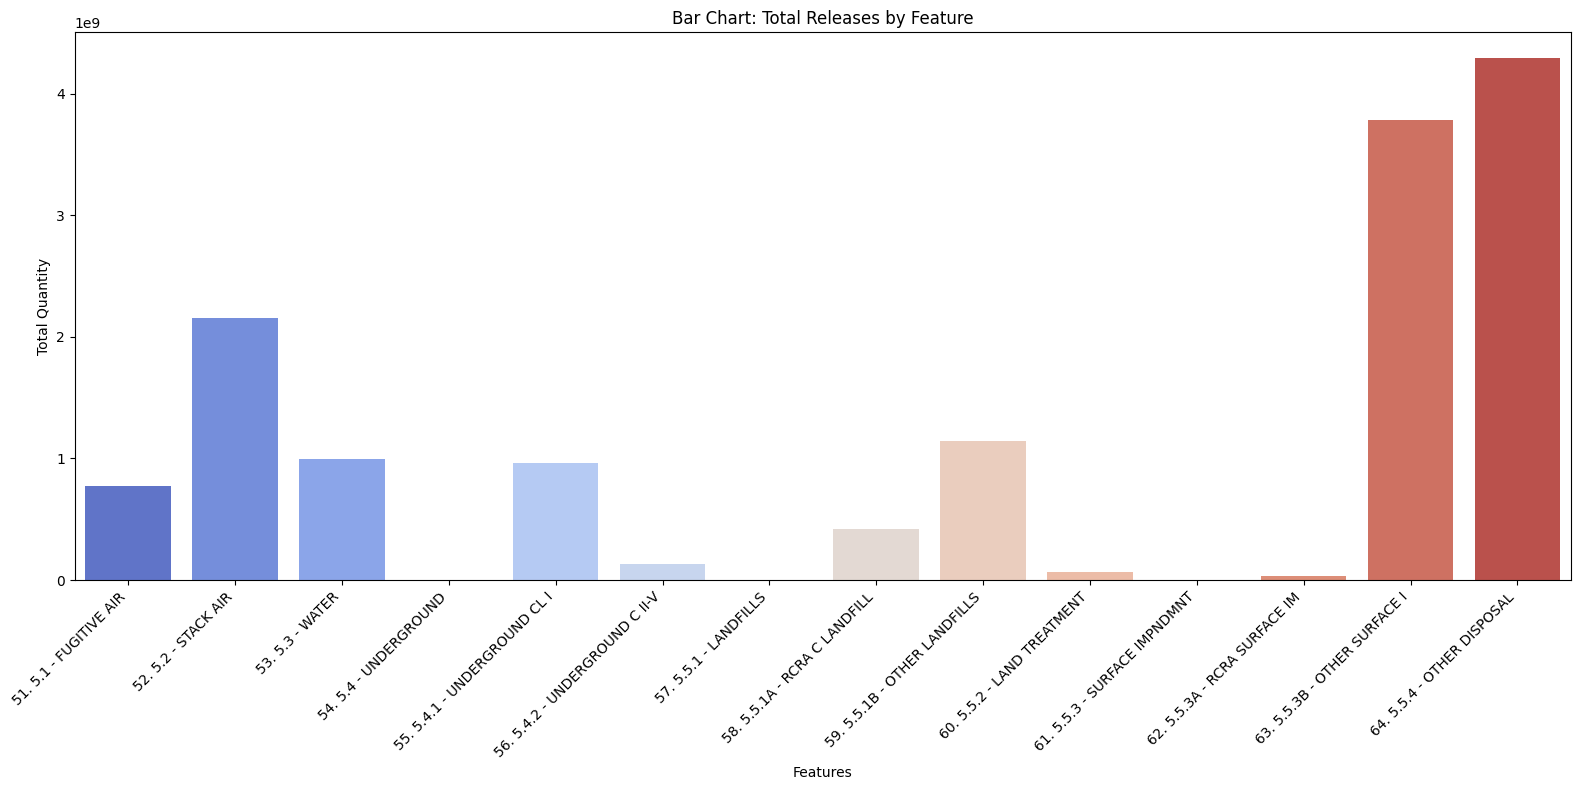

In [ ]:
features = [
    '51. 5.1 - FUGITIVE AIR', '52. 5.2 - STACK AIR', '53. 5.3 - WATER', '54. 5.4 - UNDERGROUND',
    '55. 5.4.1 - UNDERGROUND CL I', '56. 5.4.2 - UNDERGROUND C II-V', '57. 5.5.1 - LANDFILLS',
    '58. 5.5.1A - RCRA C LANDFILL', '59. 5.5.1B - OTHER LANDFILLS', '60. 5.5.2 - LAND TREATMENT',
    '61. 5.5.3 - SURFACE IMPNDMNT', '62. 5.5.3A - RCRA SURFACE IM', '63. 5.5.3B - OTHER SURFACE I',
    '64. 5.5.4 - OTHER DISPOSAL'
]

# Calculate the total values for the selected features
feature_totals = waste[features].sum()

# Creating a bar chart for total releases
plt.figure(figsize=(16, 8))
sns.barplot(
    x=feature_totals.index,
    y=feature_totals.values,
    palette="coolwarm"
)
plt.title("Bar Chart: Total Releases by Feature")
plt.xlabel("Features")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79b369e30540> (for post_execute):


KeyboardInterrupt: 

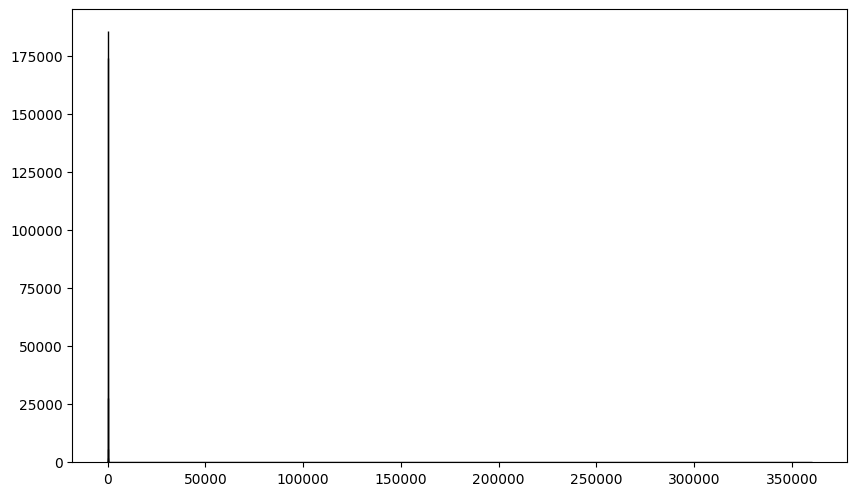

In [29]:
# Assuming waste is your DataFrame
plt.figure(figsize=(10, 20))

pairplot_features = ['122. 8.9 - PRODUCTION RATIO', '115. 8.4 - RECYCLING ON SITE', 'Total Releases']

# Creating histograms for each feature with smaller bar size
for i, feature in enumerate(pairplot_features, 1):
    plt.subplot(len(pairplot_features), 1, i)
    sns.histplot(waste[feature].dropna(), kde=True, binwidth=1)  # Adjust binwidth for smaller bars
    plt.title(f"Histogram for {feature}")

plt.tight_layout()
plt.suptitle("Histograms for Key Features", y=1.02)
plt.show()

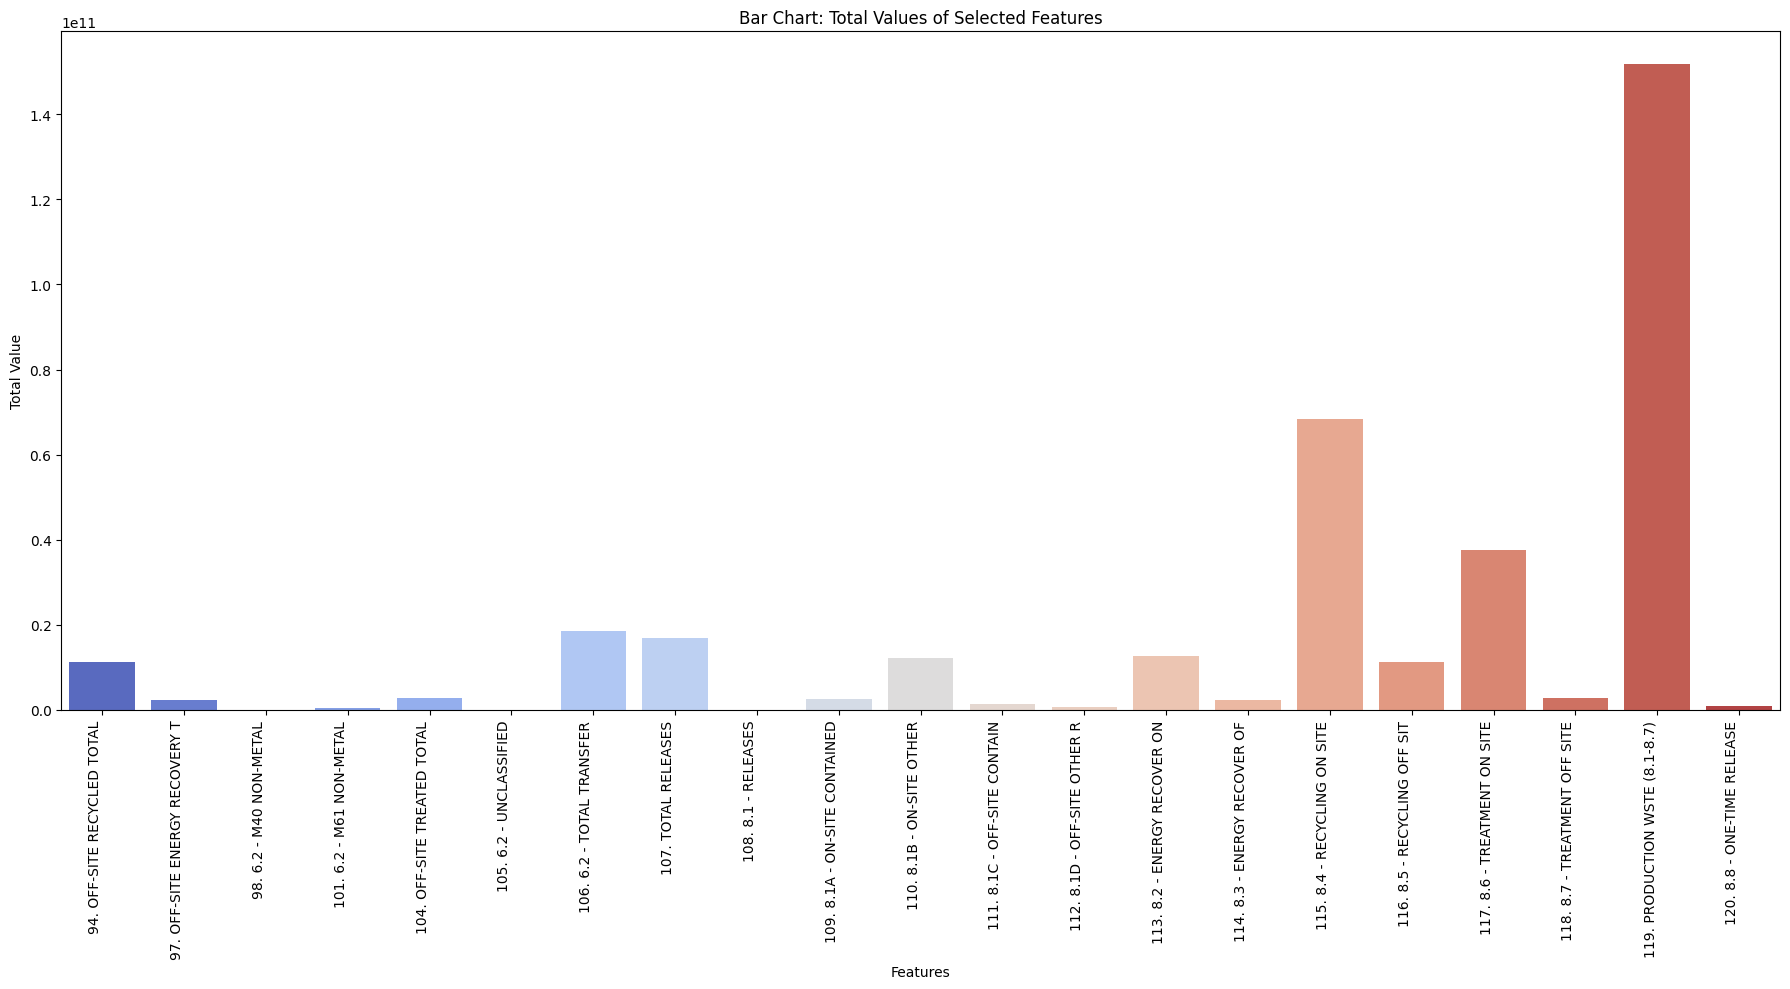

In [30]:
# Define the columns to include in the analysis
columns = [
    '94. OFF-SITE RECYCLED TOTAL', '97. OFF-SITE ENERGY RECOVERY T',
    '98. 6.2 - M40 NON-METAL', '101. 6.2 - M61 NON-METAL',  '104. OFF-SITE TREATED TOTAL', '105. 6.2 - UNCLASSIFIED',
    '106. 6.2 - TOTAL TRANSFER', '107. TOTAL RELEASES', '108. 8.1 - RELEASES',
    '109. 8.1A - ON-SITE CONTAINED', '110. 8.1B - ON-SITE OTHER', '111. 8.1C - OFF-SITE CONTAIN',
    '112. 8.1D - OFF-SITE OTHER R', '113. 8.2 - ENERGY RECOVER ON', '114. 8.3 - ENERGY RECOVER OF',
    '115. 8.4 - RECYCLING ON SITE', '116. 8.5 - RECYCLING OFF SIT', '117. 8.6 - TREATMENT ON SITE',
    '118. 8.7 - TREATMENT OFF SITE', '119. PRODUCTION WSTE (8.1-8.7)', '120. 8.8 - ONE-TIME RELEASE'
]

# Calculate total values for the selected columns
column_totals = waste[columns].sum()

# Create a bar chart for the totals
plt.figure(figsize=(18, 10))
sns.barplot(
    x=column_totals.index,
    y=column_totals.values,
    palette="coolwarm"
)
plt.title("Bar Chart: Total Values of Selected Features")
plt.xlabel("Features")
plt.ylabel("Total Value")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

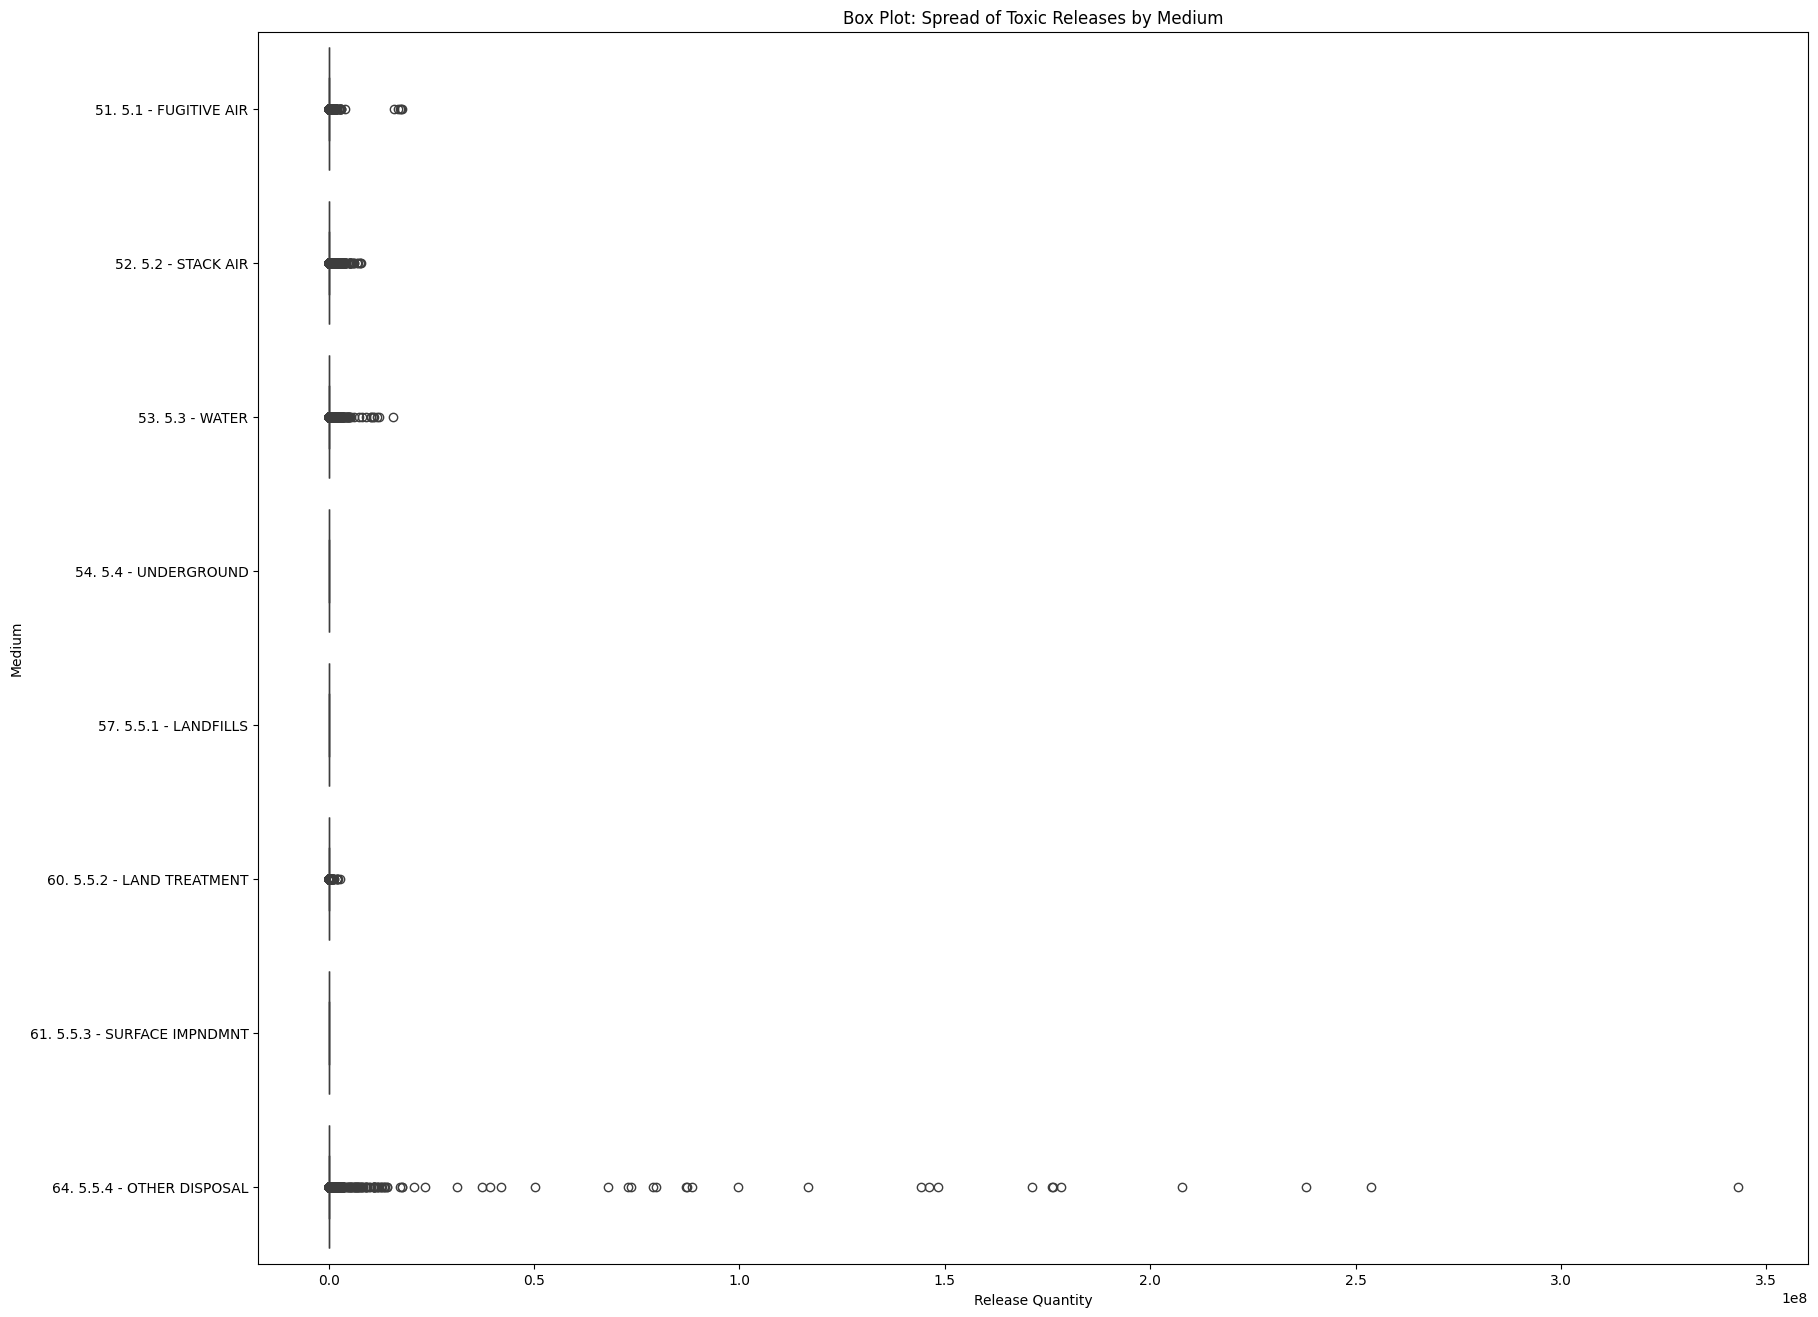

In [31]:
# Verify all release columns exist in the DataFrame
release_columns = [col for col in columns_to_fill if col in waste.columns]
# Create the box plot
plt.figure(figsize=(20, 16))
sns.boxplot(data=waste[columns_to_fill], orient='h')
plt.title("Box Plot: Spread of Toxic Releases by Medium")
plt.xlabel("Release Quantity")
plt.ylabel("Medium")
plt.show()

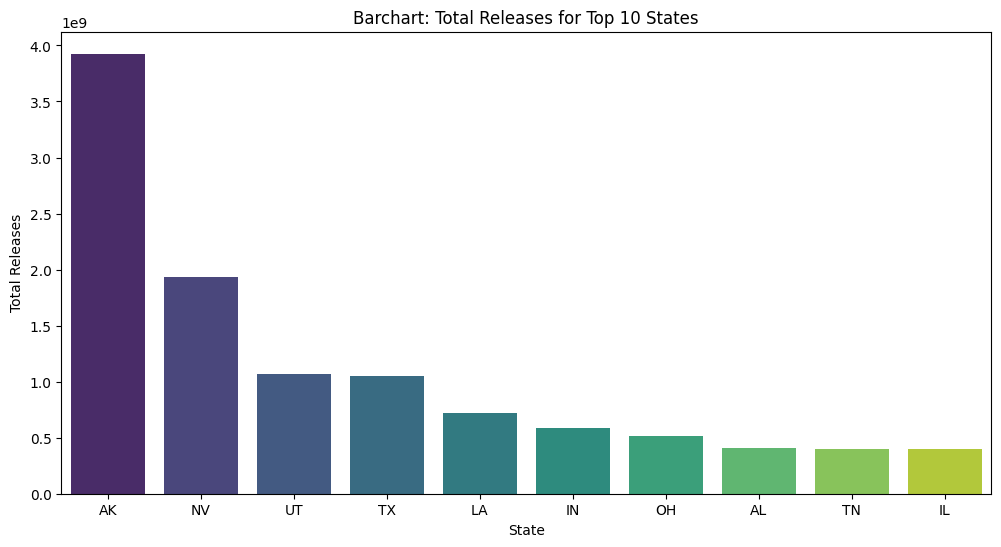

Generated additional histograms with varying visual styles and values!


In [32]:
# 3. Histogram for State-Wise Total Releases (Top 10 States)
top_states = waste.groupby('8. ST')['Total Releases'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title("Barchart: Total Releases for Top 10 States")
plt.xlabel("State")
plt.ylabel("Total Releases")
plt.show()

print("Generated additional histograms with varying visual styles and values!")

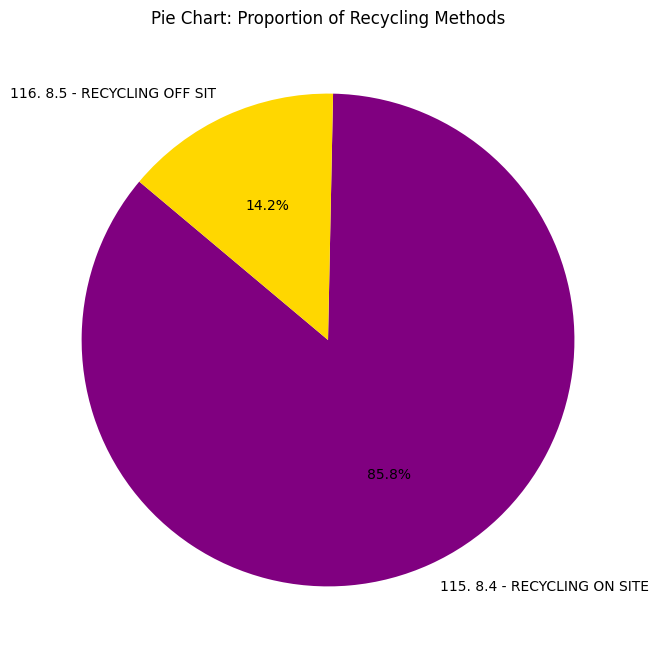

In [33]:
#. Pie Chart: Proportion of Recycling Methods (On-Site vs. Off-Site)
recycling_sums = waste[['115. 8.4 - RECYCLING ON SITE', '116. 8.5 - RECYCLING OFF SIT']].sum()
plt.figure(figsize=(8, 8))
recycling_sums.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['purple', 'gold'])
plt.title("Pie Chart: Proportion of Recycling Methods")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()

 Bivariate Visualizations (Two Variables)

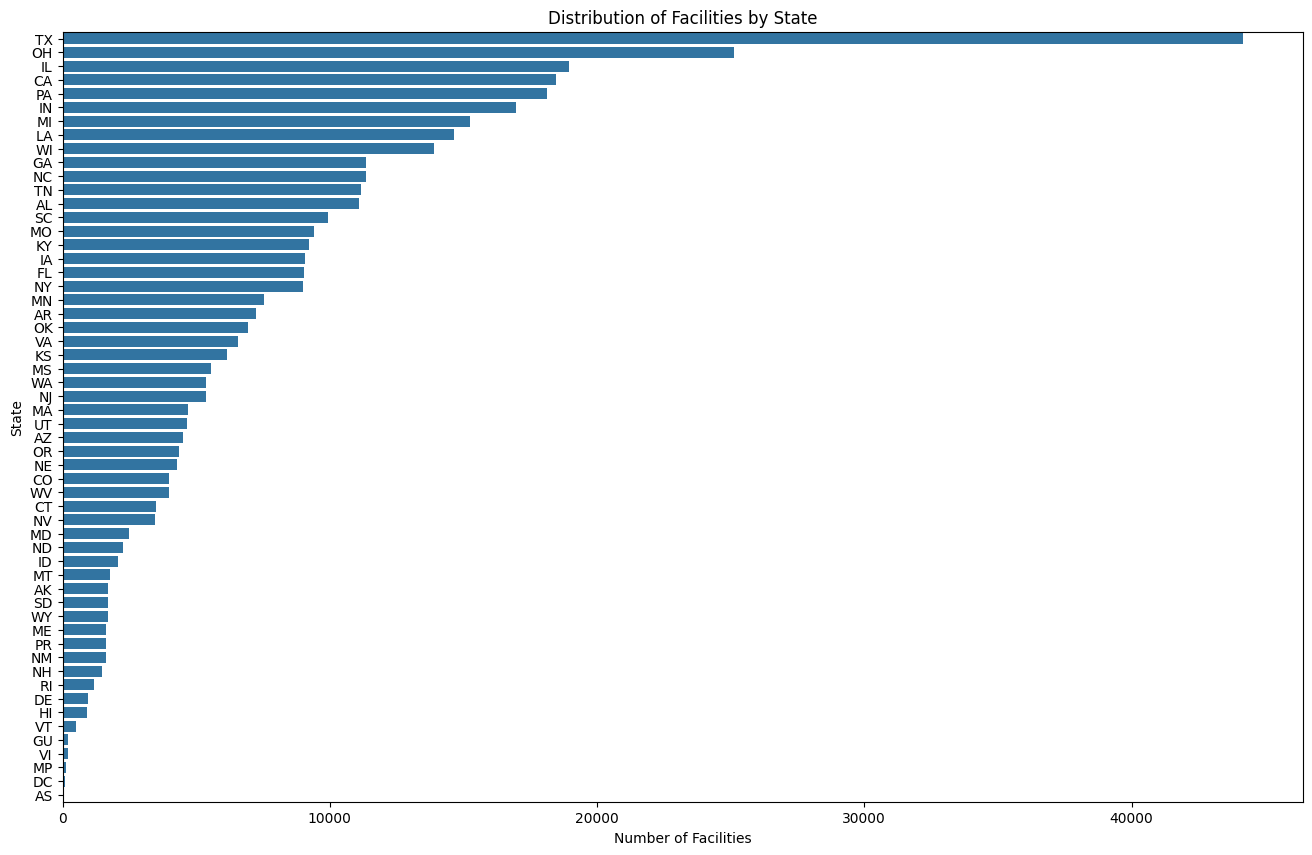

In [34]:
# 1. Distribution of Facilities by State
plt.figure(figsize=(16, 10))
sns.countplot(data=waste, y='8. ST', order=waste['8. ST'].value_counts().index)
plt.title("Distribution of Facilities by State")
plt.xlabel("Number of Facilities")
plt.ylabel("State")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398686 entries, 0 to 398685
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   12. LATITUDE                    398686 non-null  float64
 1   13. LONGITUDE                   398686 non-null  float64
 2   51. 5.1 - FUGITIVE AIR          398686 non-null  float64
 3   52. 5.2 - STACK AIR             398686 non-null  float64
 4   53. 5.3 - WATER                 398686 non-null  float64
 5   65. ON-SITE RELEASE TOTAL       398686 non-null  float64
 6   88. OFF-SITE RELEASE TOTAL      398686 non-null  float64
 7   107. TOTAL RELEASES             398686 non-null  float64
 8   119. PRODUCTION WSTE (8.1-8.7)  398686 non-null  float64
dtypes: float64(9)
memory usage: 27.4 MB
None


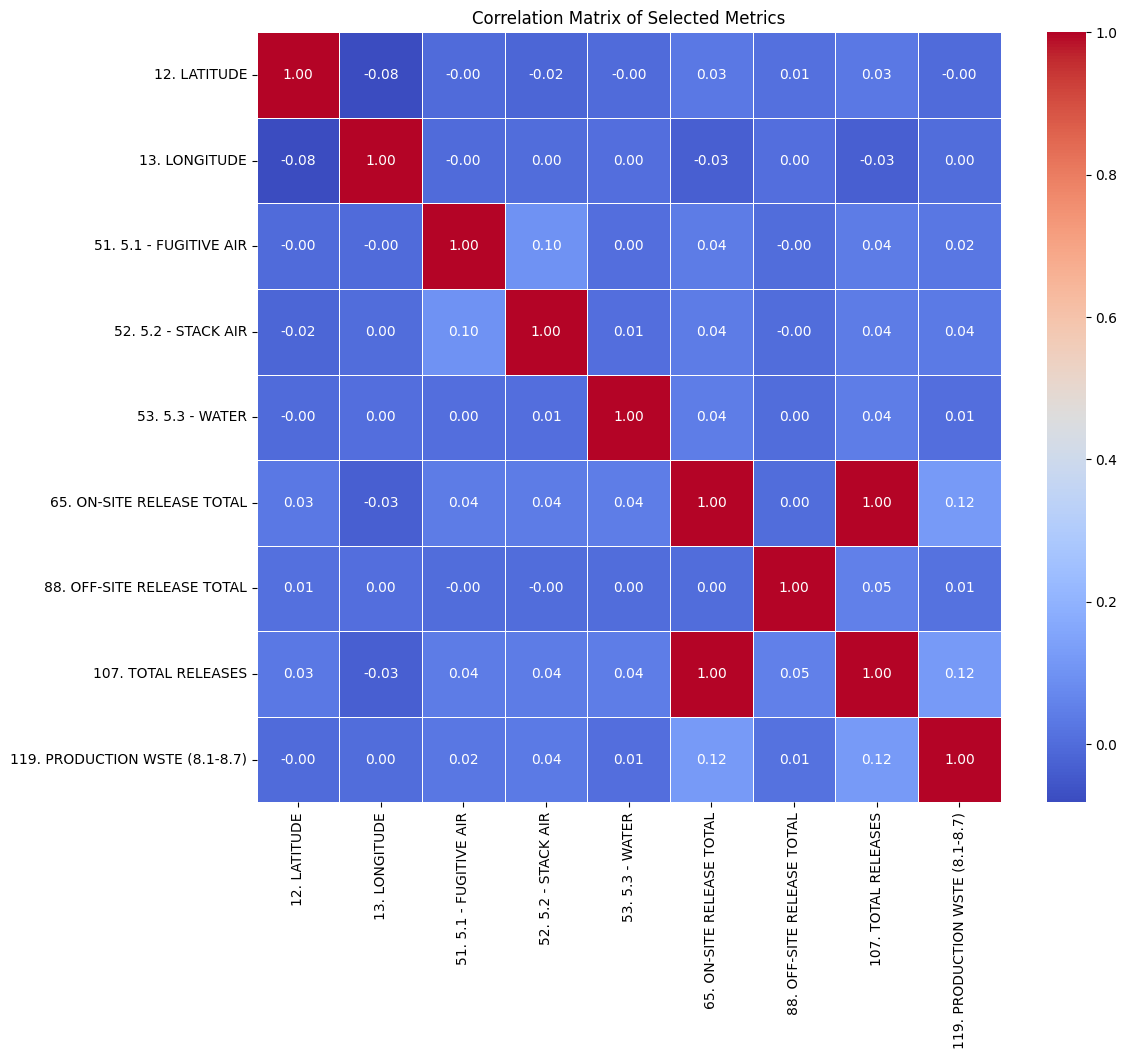

In [35]:
# Define numeric columns based on the dataset
columns_to_convert = [
    '12. LATITUDE',
    '13. LONGITUDE',
    '51. 5.1 - FUGITIVE AIR',
    '52. 5.2 - STACK AIR',
    '53. 5.3 - WATER',
    '65. ON-SITE RELEASE TOTAL',
    '88. OFF-SITE RELEASE TOTAL',
    '107. TOTAL RELEASES',
    '119. PRODUCTION WSTE (8.1-8.7)',
    # Add more numeric columns as needed
]

# Ensure all columns to convert exist in the DataFrame
valid_columns = [col for col in columns_to_convert if col in waste.columns]

if not valid_columns:
    print("None of the specified columns are present in the DataFrame.")
else:
    for col in valid_columns:
        waste[col] = pd.to_numeric(waste[col], errors='coerce')

    # Verify data types and fill missing values
    print(waste[valid_columns].info())  # Check data types
    waste[valid_columns] = waste[valid_columns].fillna(waste[valid_columns].mean())

    # Generate the correlation heatmap
    corr_matrix = waste[valid_columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Selected Metrics")
    plt.show()


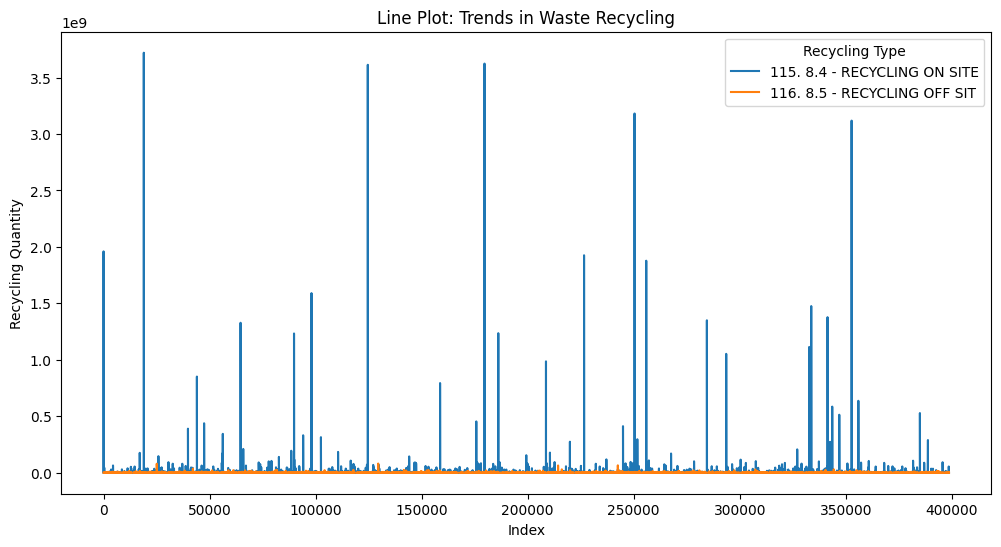

In [36]:
#12. Trends in Waste Management: Line Plot + Scatter Plot

plt.figure(figsize=(12, 6))
for col in ['115. 8.4 - RECYCLING ON SITE', '116. 8.5 - RECYCLING OFF SIT']:
    sns.lineplot(data=waste[col], label=col)
plt.title("Line Plot: Trends in Waste Recycling")
plt.xlabel("Index")
plt.ylabel("Recycling Quantity")
plt.legend(title="Recycling Type")
plt.show()

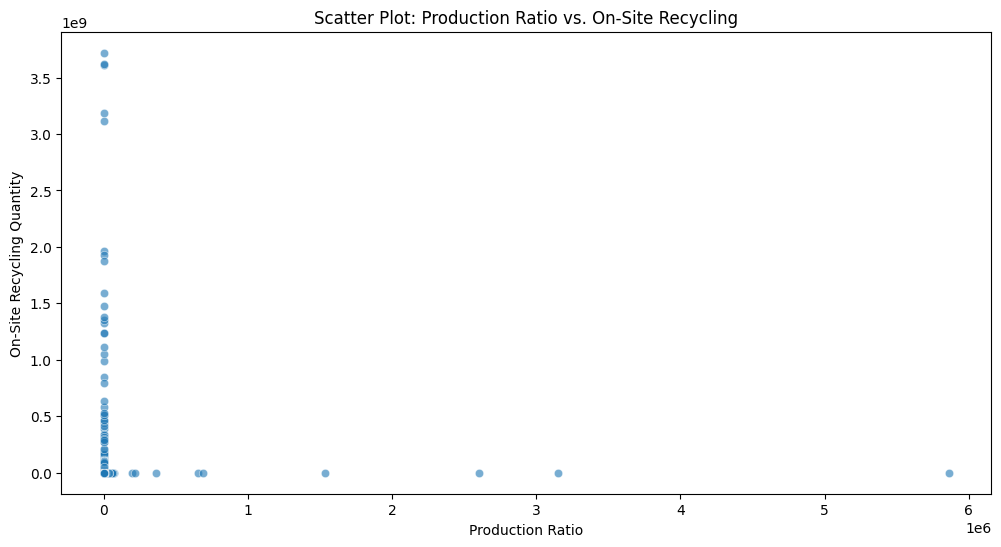

In [37]:
# 13.Scatter Plot for Production Ratios vs. Recycling
plt.figure(figsize=(12, 6))
sns.scatterplot(x=waste['122. 8.9 - PRODUCTION RATIO'], y=waste['115. 8.4 - RECYCLING ON SITE'], alpha=0.6)
plt.title("Scatter Plot: Production Ratio vs. On-Site Recycling")
plt.xlabel("Production Ratio")
plt.ylabel("On-Site Recycling Quantity")
plt.show()

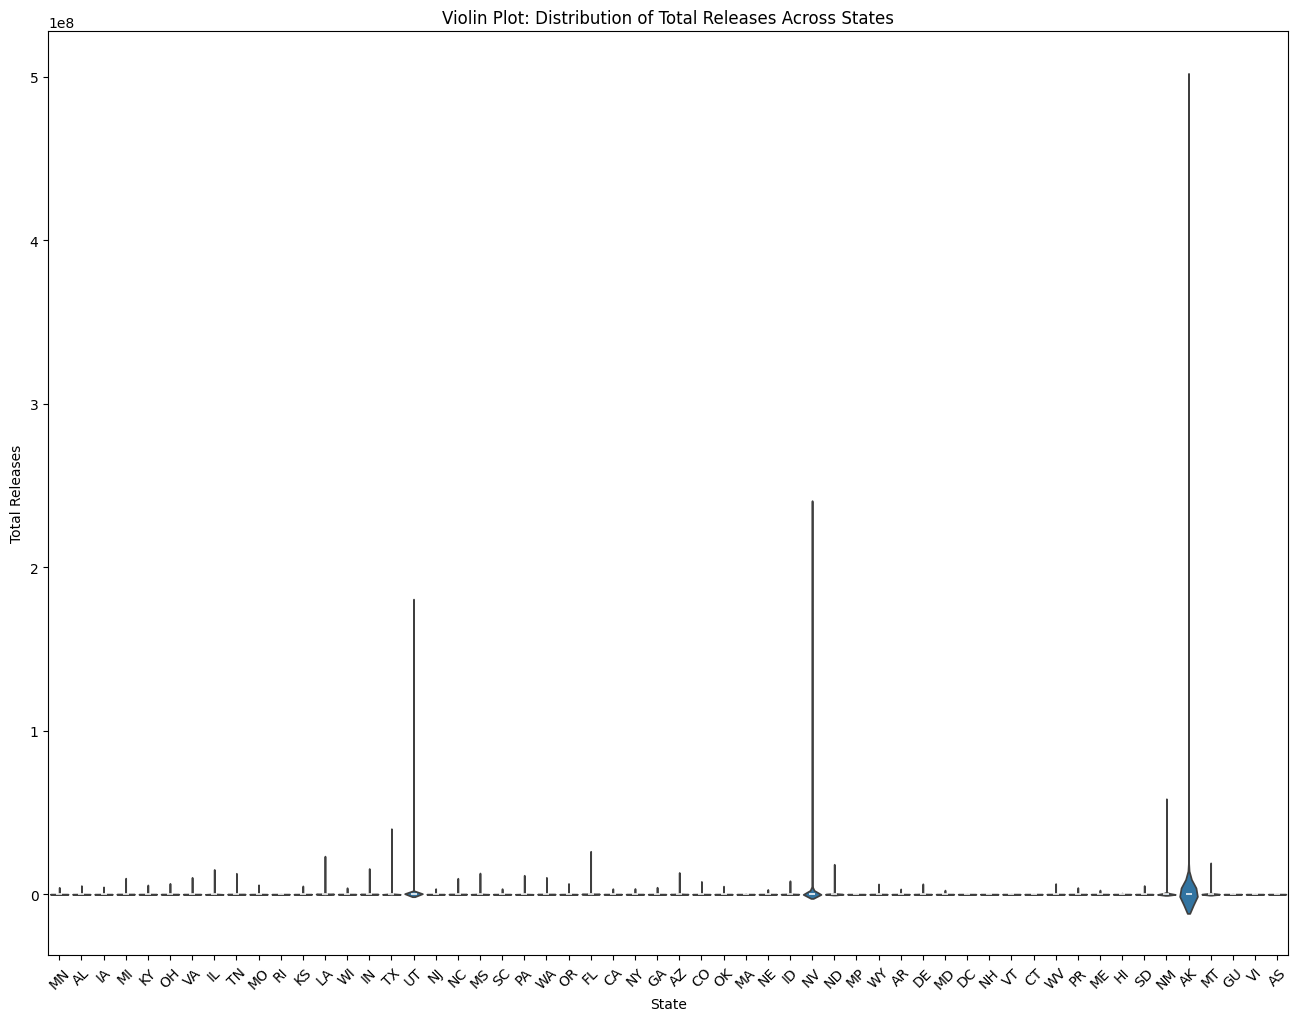

In [38]:
# 15. Violin Plot for Distribution of Releases Across States
plt.figure(figsize=(16, 12))
sns.violinplot(data=waste, x='8. ST', y='Total Releases', scale='width')
plt.title("Violin Plot: Distribution of Total Releases Across States")
plt.xlabel("State")
plt.ylabel("Total Releases")
plt.xticks(rotation=45)
plt.show()

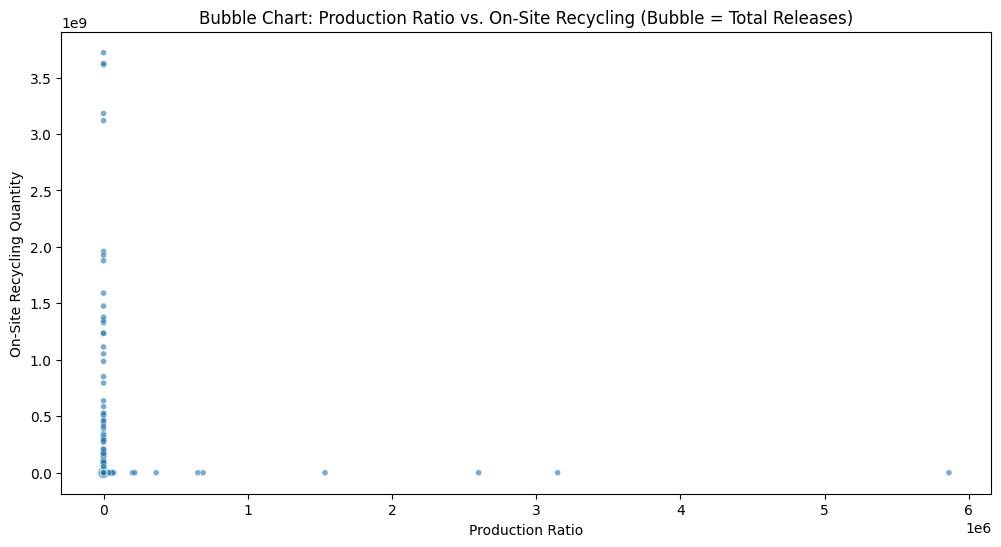

In [39]:
# 16. Bubble Chart for Waste Recycling vs. Production
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=waste,
    x='122. 8.9 - PRODUCTION RATIO',
    y='115. 8.4 - RECYCLING ON SITE',
    size='Total Releases',
    alpha=0.6, legend=False
)
plt.title("Bubble Chart: Production Ratio vs. On-Site Recycling (Bubble = Total Releases)")
plt.xlabel("Production Ratio")
plt.ylabel("On-Site Recycling Quantity")
plt.show()

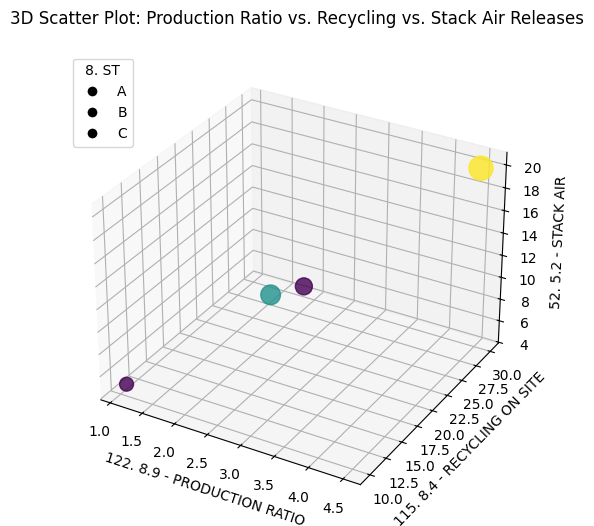

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Example data creation (replace with your actual DataFrame)
waste = pd.DataFrame({
    '122. 8.9 - PRODUCTION RATIO': [1.1, 2.3, 3.3, 4.5],
    '115. 8.4 - RECYCLING ON SITE': [10, 20, 15, 30],
    '52. 5.2 - STACK AIR': [5, 10, 15, 20],
    '8. ST': ['A', 'B', 'A', 'C'],
    'Total Releases': [100, 200, 150, 300]
})

# Extract data
x = waste['122. 8.9 - PRODUCTION RATIO']
y = waste['115. 8.4 - RECYCLING ON SITE']
z = waste['52. 5.2 - STACK AIR']
color = waste['8. ST']
size = waste['Total Releases']

# Create a figure and 3D axis
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Map categorical values to colors
color_map = {label: i for i, label in enumerate(color.unique())}
colors = [color_map[c] for c in color]

# Plot the 3D scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=size, alpha=0.8, cmap='viridis')

# Add labels
ax.set_title("3D Scatter Plot: Production Ratio vs. Recycling vs. Stack Air Releases", pad=20)
ax.set_xlabel('122. 8.9 - PRODUCTION RATIO')
ax.set_ylabel('115. 8.4 - RECYCLING ON SITE')
ax.set_zlabel('52. 5.2 - STACK AIR')

# Create legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label=label)
                 for label in color_map.keys()]
ax.legend(handles=legend_labels, title="8. ST", loc='upper left')

# Show the plot
plt.show()

#### Scatter plot for Fugitive Air Vs Stack Air

In [42]:
x_column = '51. 5.1 - FUGITIVE AIR'
y_column = '52. 5.2 - STACK AIR'

if x_column in waste.columns and y_column in waste.columns:
    x = waste[x_column]
    y = waste[y_column]

    # Fit a linear regression line
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, color='green', edgecolor='k', label='Data Points')
    plt.plot(x, m*x + b, color='red', label=f'Best Fit: y={m:.2f}x+{b:.2f}')
    plt.title(f'{x_column} vs. {y_column} with Trend Line')
    plt.xlabel('Fugitive Air Release Quantity')
    plt.ylabel('Stack Air Release Quantity')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [43]:
x_column = '119. PRODUCTION WSTE (8.1-8.7)'
y_column = '113. 8.2 - ENERGY RECOVER ON'

if x_column in waste.columns and y_column in waste.columns:
    x = waste[x_column]
    y = waste[y_column]

    # Fit a linear regression line
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, color='green', edgecolor='k', label='Data Points')
    plt.plot(x, m*x + b, color='red', label=f'Best Fit: y={m:.2f}x+{b:.2f}')
    plt.title(f'{x_column} vs. {y_column} with Trend Line')
    plt.xlabel('PRODUCTION WSTE (8.1-8.7)')
    plt.ylabel('8.2 - ENERGY RECOVER ON')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [44]:
x_column = '119. PRODUCTION WSTE (8.1-8.7)'
y_column = '114. 8.3 - ENERGY RECOVER OF'

if x_column in waste.columns and y_column in waste.columns:
    x = waste[x_column]
    y = waste[y_column]

    # Fit a linear regression line
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, color='green', edgecolor='k', label='Data Points')
    plt.plot(x, m*x + b, color='red', label=f'Best Fit: y={m:.2f}x+{b:.2f}')
    plt.title(f'{x_column} vs. {y_column} with Trend Line')
    plt.xlabel('PRODUCTION WSTE (8.1-8.7)')
    plt.ylabel('8.3 - ENERGY RECOVER OF')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [45]:
x_column = '119. PRODUCTION WSTE (8.1-8.7)'
y_column = '107. TOTAL RELEASES'

if x_column in waste.columns and y_column in waste.columns:
    x = waste[x_column]
    y = waste[y_column]

    # Fit a linear regression line
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, color='green', edgecolor='k', label='Data Points')
    plt.plot(x, m*x + b, color='red', label=f'Best Fit: y={m:.2f}x+{b:.2f}')
    plt.title(f'{x_column} vs. {y_column} with Trend Line')
    plt.xlabel('PRODUCTION WSTE (8.1-8.7)')
    plt.ylabel('TOTAL RELEASES')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

#### Histograms for Production Waste, Energy On and Off

In [46]:
# Define the column for the histogram
column = "119. PRODUCTION WSTE (8.1-8.7)"

# Filter out rows with missing or invalid data for the selected column
filtered_data = waste[column].dropna()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    filtered_data,
    bins=30,  # Adjust bin size as needed
    kde=True,  # Include a Kernel Density Estimate (smooth curve)
    color="blue",
    edgecolor="black"
)

# Add labels and title
plt.xlabel(column, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Histogram: {column}", fontsize=14)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: '119. PRODUCTION WSTE (8.1-8.7)'